<a href="https://colab.research.google.com/github/jaekyoungkim/my_project/blob/main/Python_for_NLP_Multi_label_Text_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://stackabuse.com/python-for-nlp-multi-label-tex t-classification-with-keras/


# Multi-lable Text Classification Model with Single Output Layer

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
import os
# {"username":"kimjaekyoung","key":"0a70c0c5e7c1d95868331bf32cf97933"}
# 닉네임, 토큰 설정
os.environ["KAGGLE_USERNAME"] = 'kimjaekyoung'
os.environ["KAGGLE_KEY"] = "0a70c0c5e7c1d95868331bf32cf97933"

# 데이터 받기, colab에서 리눅스 명령어를 사용할때는 앞에 !가 붙습니다.
#!kaggle competitions download -c titanic
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge
# 확인
!ls -al

jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)
total 238856
drwxr-xr-x 1 root root     4096 Apr  6 06:21 .
drwxr-xr-x 1 root root     4096 Apr  6 06:14 ..
drwxr-xr-x 4 root root     4096 Mar 23 14:21 .config
drwx------ 5 root root     4096 Apr  6 06:18 gdrive
-rw-r--r-- 1 root root 55201987 Apr  6 05:54 jigsaw-toxic-comment-classification-challenge.zip
-rw-r--r-- 1 root root    22277 Apr  6 06:21 model_plot4a.png
drwxr-xr-x 1 root root     4096 Mar 23 14:22 sample_data
-rw-r--r-- 1 root root  1459715 Dec 11  2019 sample_submission.csv.zip
-rw-r--r-- 1 root root 60354593 Jan 18  2018 test.csv
-rw-r--r-- 1 root root 24577258 Dec 11  2019 test.csv.zip
-rw-r--r-- 1 root root  4976930 Jun 19  2018 test_labels.csv
-rw-r--r-- 1 root root  1527605 Dec 11  2019 test_labels.csv.zip
-rw-r--r-- 1 root root 68802655 Jan 18  2018 train.csv
-rw-r--r-- 1 root root 27619914 Dec 11  2019 train.csv.zip


In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip test_labels.csv.zip

Archive:  test_labels.csv.zip
  inflating: test_labels.csv         


In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
toxic_comments = pd.read_csv("/content/train.csv")

In [ ]:
print(toxic_comments.shape)

toxic_comments.head(20)

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
filter = toxic_comments["comment_text"] != "" # 비어있는 것들은 제거하기
toxic_comments = toxic_comments[filter]
toxic_comments = toxic_comments.dropna()

In [ ]:
print("Toxic:" + str(toxic_comments["toxic"][168]))
print("Severe_toxic:" + str(toxic_comments["severe_toxic"][168]))
print("Obscene:" + str(toxic_comments["obscene"][168]))
print("Threat:" + str(toxic_comments["threat"][168]))
print("Insult:" + str(toxic_comments["insult"][168]))
print("Identity_hate:" + str(toxic_comments["identity_hate"][168]))

Toxic:1
Severe_toxic:0
Obscene:0
Threat:0
Insult:1
Identity_hate:0


In [ ]:
toxic_comments_labels = toxic_comments[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
toxic_comments_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


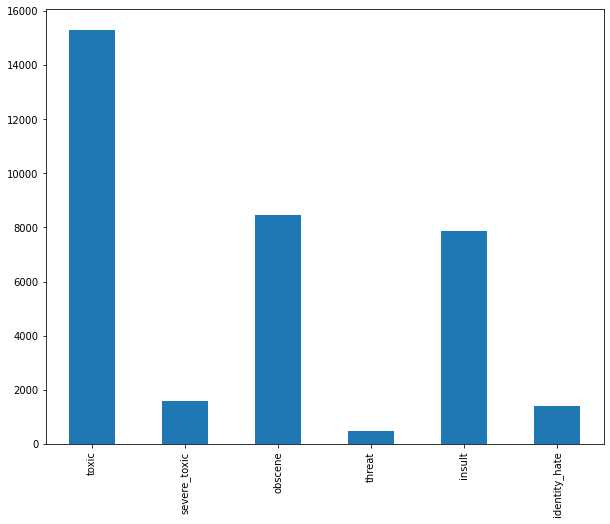

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [ ]:
fig_size

[10, 8]

In [ ]:
# 텍스트 부분 전처리

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen) 

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(toxic_comments["comment_text"]) ; sentences
for sen in sentences: # semtences 에서 하나씩 불러옴
    X.append(preprocess_text(sen)) # 전처리 한후에 X 에 하나씩 넣음
X

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren vandalisms just closure on some GAs after voted at New York Dolls FAC And please don remove the template from the talk page since m retired now ',
 'D aww He matches this background colour m seemingly stuck with Thanks talk January UTC ',
 'Hey man m really not trying to edit war It just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info ',
 ' More can make any real suggestions on improvement wondered if the section statistics should be later on or subsection of types of accidents think the references may need tidying so that they are all in the exact same format ie date format etc can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be backlog on

In [ ]:
print(len(X)) # 159571

159571


In [ ]:
y = toxic_comments_labels.values
print(y.shape)
print(y)

(159571, 6)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# WORD EMBEDDING
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train.shape

(127656, 200)

In [ ]:
print(X_train[1])
print(X_train[1].shape) # maxlen=200이기 떄문에 padding 200까지 함

[  82  177    8   45   14   20    5   83    2 1429    2   88  920    3
    1  564 3602    4   80   39   45   14   46 3188    2 2747  377    5
   97  726  331   84   12   16   96  816   23   12    4   45   80  238
    1 1332  352   15  995  115 2191   70    2   71  143   77  107   15
  102   24   50  413    5   16    2   14   57 1633    9    7  271  159
   18  125    4    7  625    6    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# 구글드라이브에 핸들링한 데이터 넣어둠
# .(마침표) 남겨둔 데이터 FOR sentence 나누기
# 파일명 : notes_labeled_binarized / notes_labeled_50_binarized

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# glove word vector 사용하기
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/gdrive/My Drive/dataset/glove/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [81]:
embedding_matrix.shape # (148243, 100) 0으로 구성됨

(148243, 100)

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          14824300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 14,942,322
Trainable params: 118,022
Non-trainable params: 14,824,300
_________________________________________________________________
None


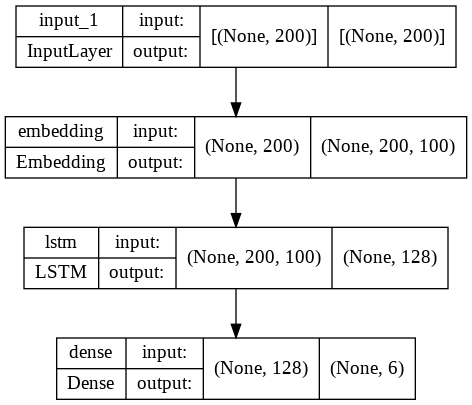

In [ ]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
798/798 [==============================] - 671s 834ms/step - loss: 0.1480 - acc: 0.9729 - val_loss: 0.1425 - val_acc: 0.9943
Epoch 2/5
798/798 [==============================] - 559s 701ms/step - loss: 0.1409 - acc: 0.9941 - val_loss: 0.1427 - val_acc: 0.9943
Epoch 3/5
798/798 [==============================] - 566s 709ms/step - loss: 0.1410 - acc: 0.9941 - val_loss: 0.1426 - val_acc: 0.9943
Epoch 4/5
798/798 [==============================] - 558s 699ms/step - loss: 0.1409 - acc: 0.9941 - val_loss: 0.1425 - val_acc: 0.9943
Epoch 5/5
798/798 [==============================] - 556s 697ms/step - loss: 0.1408 - acc: 0.9941 - val_loss: 0.1426 - val_acc: 0.9943


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

998/998 [==============================] - 69s 69ms/step - loss: 0.1419 - acc: 0.9941
Test Score: 0.14194545149803162
Test Accuracy: 0.9941093325614929


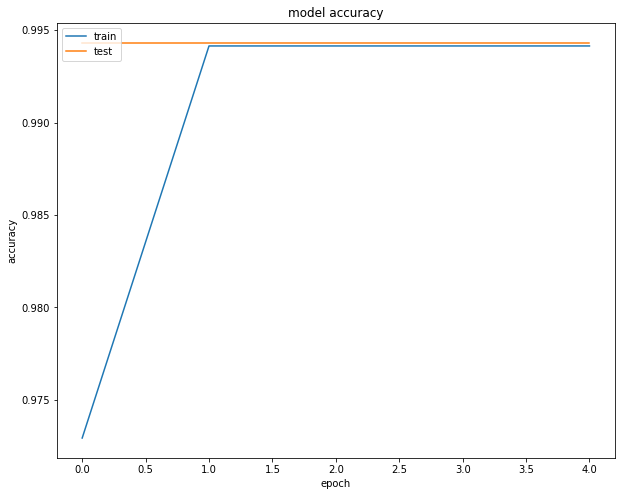

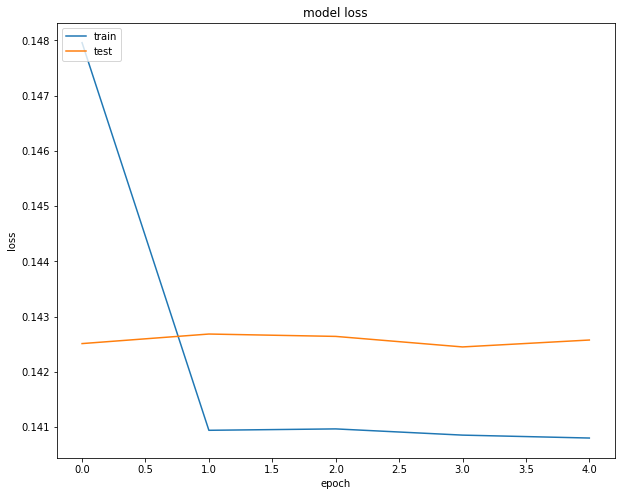

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Multi-lable Text Classification Model with Multiple Output Layers

In [ ]:

# In this section we will create a multi-label text classification model where each output label will have a dedicated output dense layer.
# Let's first define our preprocessing function:


In [ ]:
X = []
sentences = list(toxic_comments["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = toxic_comments[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# First output
y1_train = y_train[["toxic"]].values
y1_test =  y_test[["toxic"]].values

# Second output
y2_train = y_train[["severe_toxic"]].values
y2_test =  y_test[["severe_toxic"]].values

# Third output
y3_train = y_train[["obscene"]].values
y3_test =  y_test[["obscene"]].values

# Fourth output
y4_train = y_train[["threat"]].values
y4_test =  y_test[["threat"]].values

# Fifth output
y5_train = y_train[["insult"]].values
y5_test =  y_test[["insult"]].values

# Sixth output
y6_train = y_train[["identity_hate"]].values
y6_test =  y_test[["identity_hate"]].values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 100)     14824300    ['input_2[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 128)          117248      ['embedding_1[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 1)            129         ['lstm_1[0][0]']                 
                                                                                            

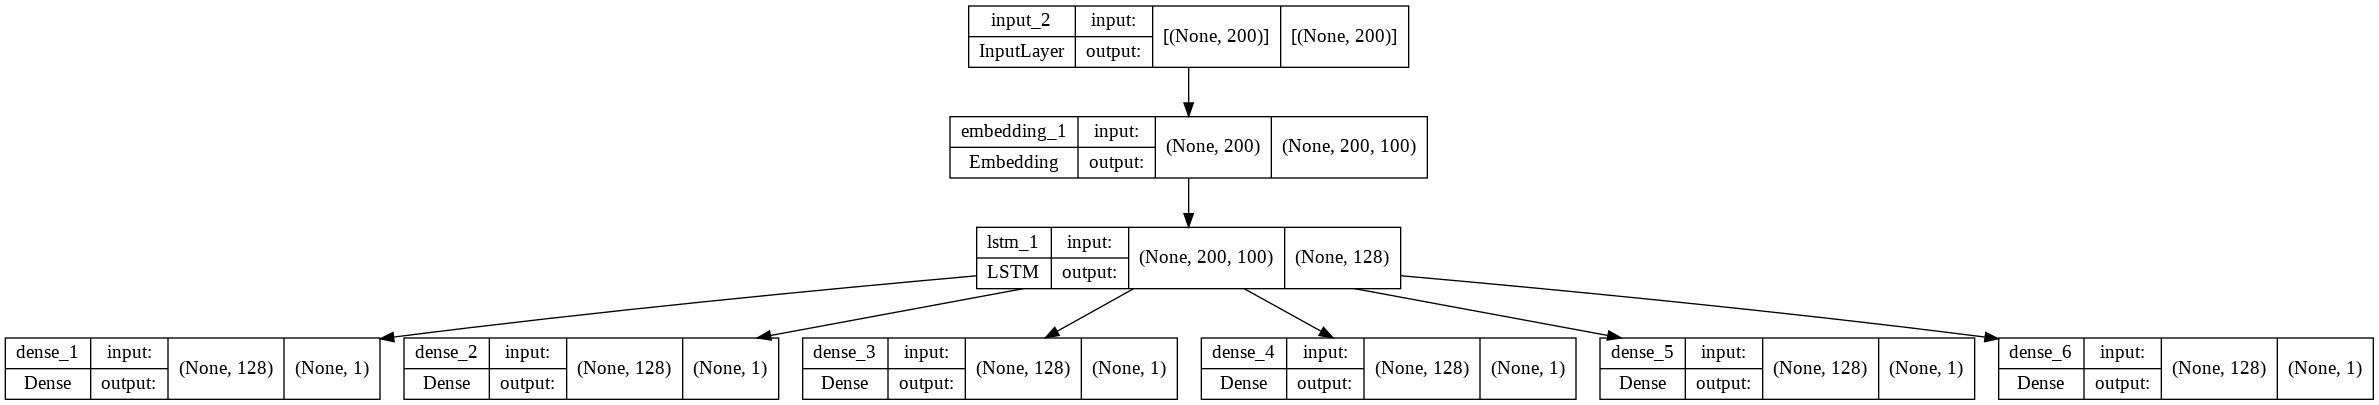

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train], batch_size=8192, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 541s 41s/step - loss: 3.3985 - dense_1_loss: 0.6090 - dense_2_loss: 0.5437 - dense_3_loss: 0.5671 - dense_4_loss: 0.5197 - dense_5_loss: 0.6330 - dense_6_loss: 0.5260 - dense_1_acc: 0.9043 - dense_2_acc: 0.9900 - dense_3_acc: 0.9474 - dense_4_acc: 0.9969 - dense_5_acc: 0.9510 - dense_6_acc: 0.9916 - val_loss: 1.0203 - val_dense_1_loss: 0.3173 - val_dense_2_loss: 0.0680 - val_dense_3_loss: 0.2104 - val_dense_4_loss: 0.0309 - val_dense_5_loss: 0.3375 - val_dense_6_loss: 0.0561 - val_dense_1_acc: 0.9036 - val_dense_2_acc: 0.9901 - val_dense_3_acc: 0.9468 - val_dense_4_acc: 0.9967 - val_dense_5_acc: 0.9509 - val_dense_6_acc: 0.9902
Epoch 2/5
13/13 [==============================] - 567s 44s/step - loss: 0.8909 - dense_1_loss: 0.3182 - dense_2_loss: 0.0578 - dense_3_loss: 0.2144 - dense_4_loss: 0.0235 - dense_5_loss: 0.2279 - dense_6_loss: 0.0491 - dense_1_acc: 0.9043 - dense_2_acc: 0.9900 - dense_3_acc: 0.9474 - dense_4_acc: 0.9969 - dense

In [ ]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

998/998 [==============================] - 71s 71ms/step - loss: 0.8505 - dense_1_loss: 0.3157 - dense_2_loss: 0.0563 - dense_3_loss: 0.2094 - dense_4_loss: 0.0164 - dense_5_loss: 0.2004 - dense_6_loss: 0.0523 - dense_1_acc: 0.9042 - dense_2_acc: 0.9899 - dense_3_acc: 0.9463 - dense_4_acc: 0.9977 - dense_5_acc: 0.9494 - dense_6_acc: 0.9908
Test Score: 0.8505489230155945
Test Accuracy: 0.315698504447937


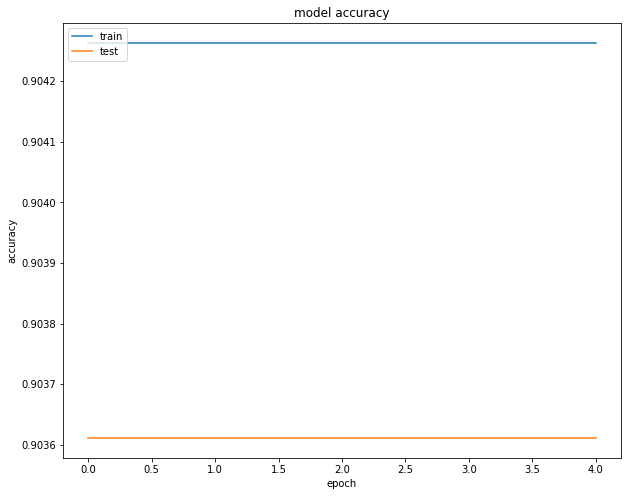

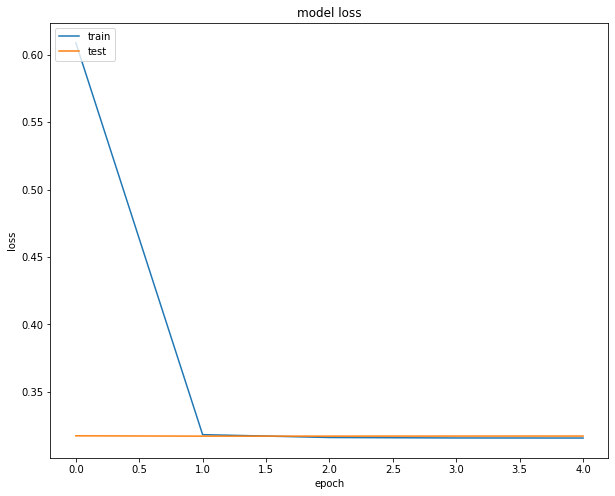

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['dense_1_acc'])
plt.plot(history.history['val_dense_1_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['dense_1_loss'])
plt.plot(history.history['val_dense_1_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Multi-label text classification is one of the most common text classification problems. 
# In this article, we studied two deep learning approaches for multi-label text classification.
# In the first approach we used a single dense output layer with multiple neurons where each neuron represented one label.

#In the second approach, we created separate dense layers for each label with one neuron. 
# Results show that in our case, single output layer with multiple neurons works better than multiple output layers.

#As a next step, I would advise you to change the activation function and the train test split to see if you can get better results than the one presented in this article.